In [49]:
from imports import *
from PyAstronomy.pyasl import broadGaussFast
%matplotlib inline

m2micron = lambda wl: wl*1e6
percentdepth2ppm = lambda spec: spec*1e-2*1e6

## Look at example transmission spectra from various atmospheric "colums"

In [74]:
# define wavelength range of interest in microns and spectral R
def define_stuff(dic):
    xlim = dic['wlrange']
    R = dic['R']
    wlcen = dic['wlcen']
    return xlim, R, wlcen

niriss_soss = {'wlrange': (.6, 2.8), 'R': 7e2, 'wlcen': 1.25}
nirspec_bots = {'wlrange': (2.87, 5.27), 'R': 1e3, 'wlcen': 3.95}
miri_lrs = {'wlrange': (5, 14), 'R': 1e2, 'wlcen': 7.5}

xlim, R, wlcen = define_stuff(niriss_soss)
sigma = wlcen / (R*2*np.sqrt(2*np.log(2)))

In [75]:
# Get Earth-like transmission spectra from ExoTransmit
fs = np.array(glob.glob('../Exo_Transmit/Spectra/earth_*'))
Nearth = fs.size
Earthlike_spectra = np.zeros((fs.size, np.loadtxt(fs[0], skiprows=2)[:,0].size))
for i in range(fs.size):
    wl, spec = np.loadtxt(fs[i], skiprows=2).T
    wl, Earthlike_spectra[i] = m2micron(wl), percentdepth2ppm(spec)
    # create equidistant spectral grid
    fint = interp1d(wl, Earthlike_spectra[i])
    wl = np.linspace(wl.min(), wl.max(), wl.size)
    Earthlike_spectra[i] = broadGaussFast(wl, fint(wl), sigma)

In [76]:
# Get tidally-locked transmission spectra from ExoTransmit
fs = np.array(glob.glob('../Exo_Transmit/Spectra/TIDAL1.0.001*')) 
Ntidal = fs.size
tidal_spectra = np.zeros((fs.size, wl.size))
for i in range(fs.size):
    wl, spec = np.loadtxt(fs[i], skiprows=2).T
    wl, tidal_spectra[i] = m2micron(wl), percentdepth2ppm(spec)
    # create equidistant spectral grid
    fint = interp1d(wl, tidal_spectra[i])
    wl = np.linspace(wl.min(), wl.max(), wl.size)
    tidal_spectra[i] = broadGaussFast(wl, fint(wl), sigma)

(<matplotlib.text.Text at 0x1a27545e90>,
 <matplotlib.text.Text at 0x1a278e9590>)

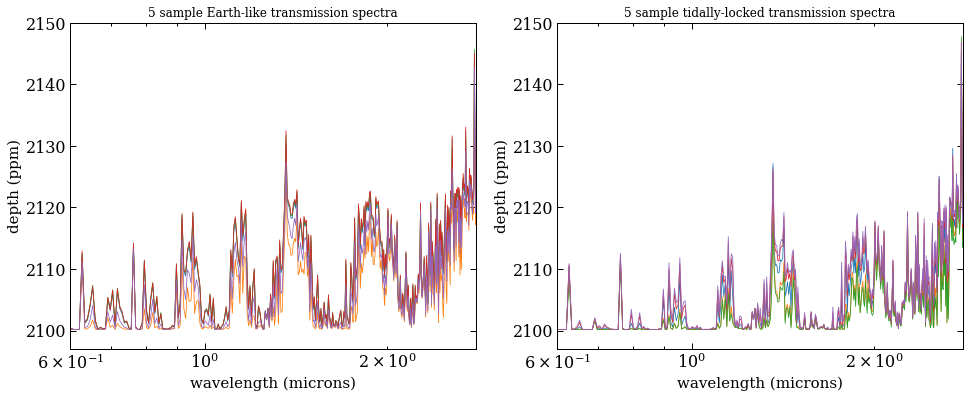

In [77]:
# plot random Earth-like spectra
inds, plotted, Nspectra = [], 0, 5
plt.figure(figsize=(16,6))
plt.subplot(121)
while plotted < Nspectra:
    j = np.random.randint(Nearth)
    if j not in inds:
        inds.append(j)
        plotted += 1
        plt.plot(wl, broadGaussFast(wl, Earthlike_spectra[j], sigma), '-', lw=.8)
plt.xscale('log'), plt.xlim(xlim), plt.ylim((2097, 2150)), plt.ylabel('depth (ppm)')
plt.xlabel('wavelength (microns)'), plt.title('%i sample Earth-like transmission spectra'%Nspectra)

# plot random tidally-locked spectra
inds, plotted = [], 0
plt.subplot(122)
while plotted < Nspectra:
    j = np.random.randint(Ntidal)
    if j not in inds:
        inds.append(j)
        plotted +=1
        plt.plot(wl, broadGaussFast(wl, tidal_spectra[j], sigma), '-', lw=.8)
plt.xscale('log'), plt.xlim(xlim), plt.ylim((2097, 2150)), plt.ylabel('depth (ppm)')
plt.xlabel('wavelength (microns)'), plt.title('%i sample tidally-locked transmission spectra'%Nspectra)

## Look at the combined transmission spectra

In [78]:
# get combined spectra
wlE, specE = np.loadtxt('../Exo_Transmit/Spectra/Earthlike', skiprows=2).T 
wlE, specE = m2micron(wlE), percentdepth2ppm(specE)
fint = interp1d(wlE, specE)
wlE = np.linspace(wlE.min(), wlE.max(), wlE.size)
specE = broadGaussFast(wlE, fint(wlE), sigma)

wlT, specT = np.loadtxt('../Exo_Transmit/Spectra/Tidallylocked', skiprows=2).T
wlT, specT = m2micron(wlT), percentdepth2ppm(specT)
fint = interp1d(wlT, specT)
wlT = np.linspace(wlT.min(), wlT.max(), wlT.size)
specT = broadGaussFast(wlT, fint(wlT), sigma)

(<matplotlib.text.Text at 0x1a27d5aad0>,
 <matplotlib.text.Text at 0x1a2815c5d0>)

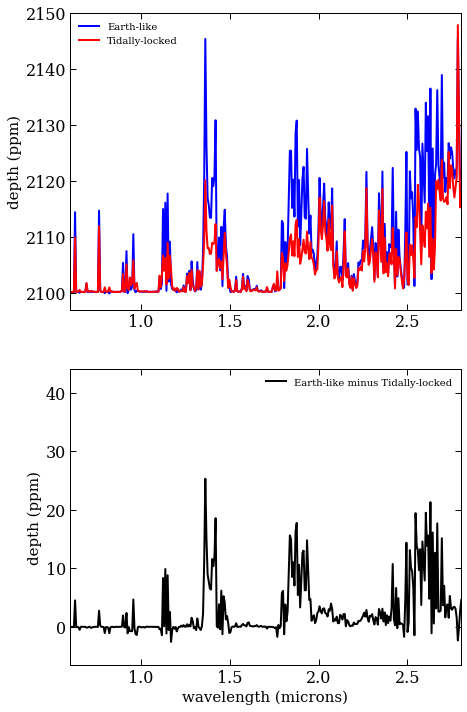

In [79]:
plt.figure(figsize=(7,12))
plt.subplot(211)
plt.plot(wlE, specE, 'b-', label='Earth-like'), plt.plot(wlT, specT, 'r-', label='Tidally-locked')
plt.xlim(xlim), plt.ylabel('depth (ppm)'), plt.ylim((2097, 2150)), plt.legend(loc='upper left')

plt.subplot(212)
plt.plot(wlE, specE-specT, 'k-', label='Earth-like minus Tidally-locked')
plt.xlim(xlim), plt.legend(loc='upper right')
plt.ylabel('depth (ppm)'), plt.xlabel('wavelength (microns)')